# Single Neuron Regression Model

In this notebook we implement the single neuron model together with the gradient descent algorithm in order to solve a linear regression problem.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data retrieval
The data is retrieved from the Energy Efficiency dataset from UCI repository: https://archive.ics.uci.edu/dataset/242/energy+efficiency

The idea is to predict the Heating Load (column Y1) of the building using the Surface Area (column X2).

In [2]:
# Load the dataset from the Excel file
file_path = '/Users/ceciliaalberti/Documents/INDE_577/datasets/ENB2012_data.xlsx' 
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [3]:
# Selection of X and y

X = df['X2'].values.reshape(-1, 1)  # Surface area
y = df['Y1'] # Heating Load

# Data pre-processing
1. The data will be split into training and testing datasets (80/20 split).
2. The data will be normalized for better training performance. This step ensures that all the features (columns) in the dataset are on the same scale.

In [4]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data for better training performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Single Neuron creation
The Single Neuron class will simulate a single artificial neuron. In a neural network, a neuron is a fundamental unit that processes input data by applying a linear transformation (with weights and a bias) and then passes the result through an activation function.

In [5]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron.

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias.
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration
        of stochastic gradient descent per epoch.

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha. The data
        used consists of feature vectors X and associated labels y.

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the
        activation_function to make a y_hat prediction on each feature vector.
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

# Linear activation function
def linear_activation(x):
    return x

# Model training and data visualization
Two visualizations will be created to evaluate the performance of the single neuron model.

In [6]:
# Train the model
alpha = 0.0001  # smaller learning rate for demonstration
epochs = 50
node = SingleNeuron(activation_function=linear_activation)
node.train(X_train_scaled, y_train, alpha=alpha, epochs=epochs)

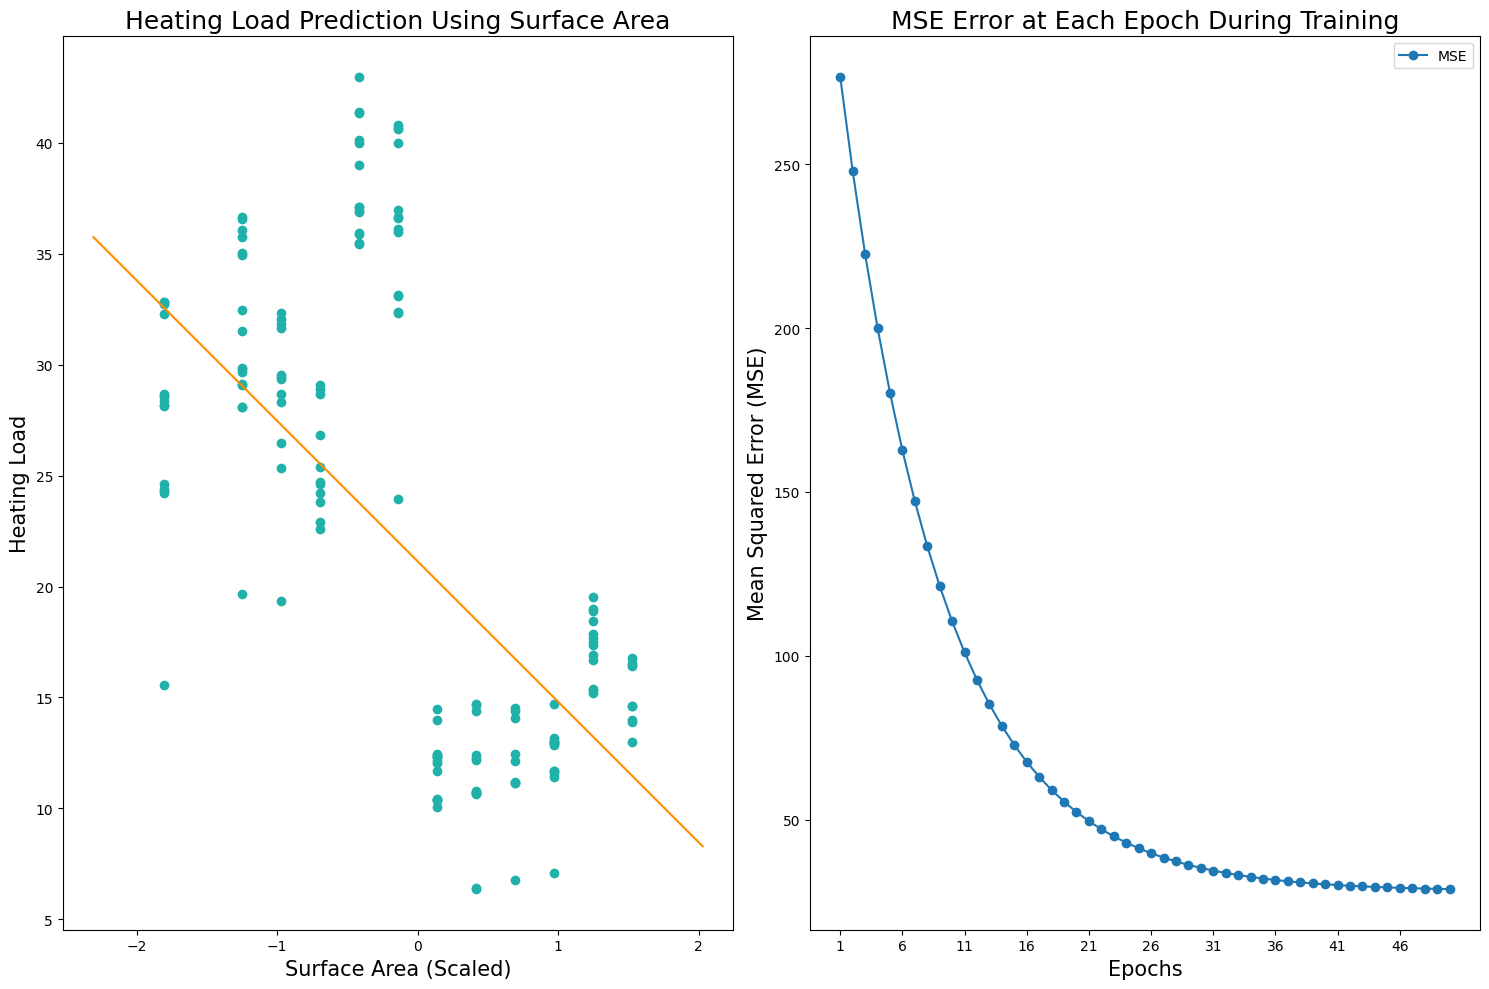

In [7]:
# Create the domain for plotting predictions
domain = np.linspace(np.min(X_test_scaled[:, 0]) - .5, np.max(X_test_scaled[:, 0]) + .5, 100)

# Fix the domain to match the number of features (which is 1 now)
domain_full = domain.reshape(-1, 1)

# Create subplots for both the prediction and the error plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# First subplot: Scatter plot and prediction line
ax1.scatter(X_test_scaled[:, 0], y_test, color="lightseagreen", label="Actual Heating Load")
ax1.plot(domain, node.predict(domain_full), color='darkorange', label=f"Predictions (alpha={alpha})")
ax1.set_xlabel("Surface Area (Scaled)", fontsize=15)
ax1.set_ylabel("Heating Load", fontsize=15)
ax1.set_title("Heating Load Prediction Using Surface Area", fontsize=18)

# Second subplot: MSE over epochs
ax2.plot(range(1, len(node.errors_) + 1),
         node.errors_,
         marker="o",
         label="MSE")
ax2.set_xlabel("Epochs", fontsize=15)
ax2.set_ylabel("Mean Squared Error (MSE)", fontsize=15)
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize=10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize=18)

# Show the plots
plt.tight_layout()
plt.show()

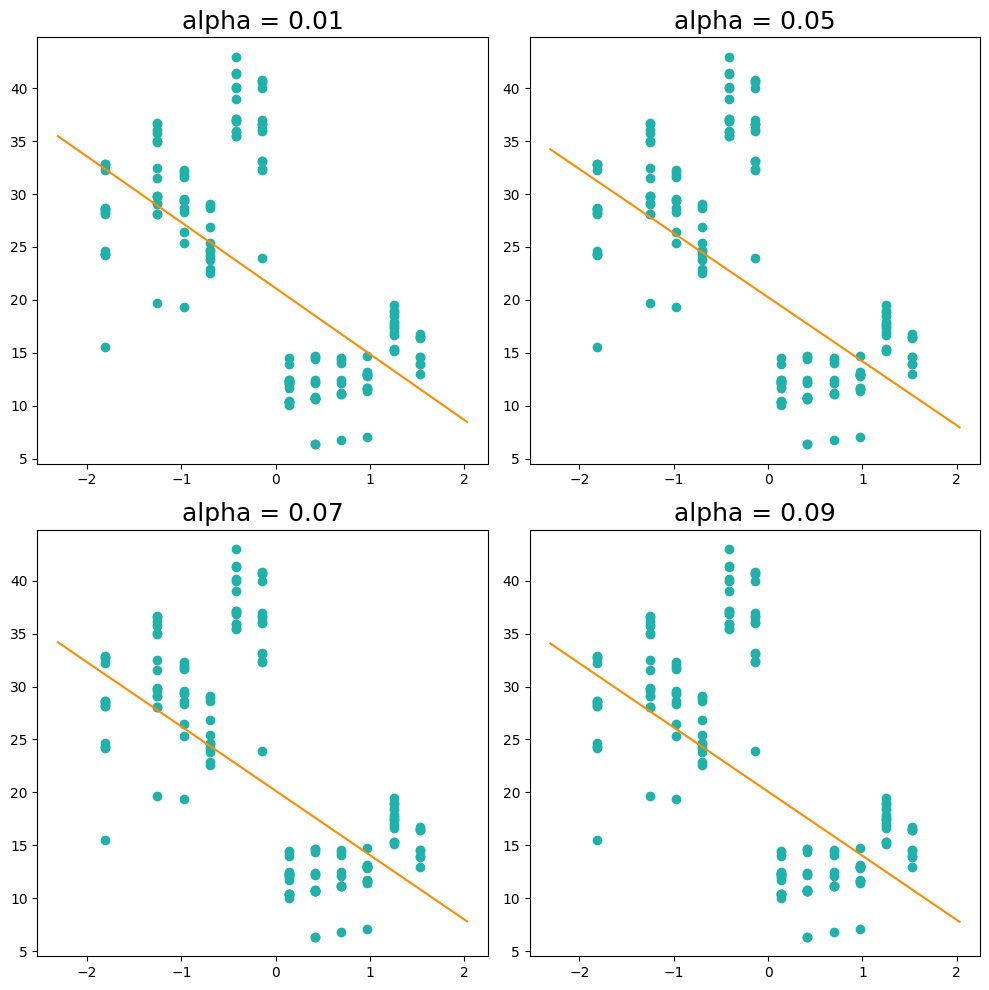

In [8]:
# Other possible choices of learning rates
alphas = [0.01, 0.05, 0.07, 0.09]

# Create the domain for plotting predictions
domain = np.linspace(np.min(X_test_scaled[:, 0]) - .5, np.max(X_test_scaled[:, 0]) + .5, 100)

# Fix the domain to match the number of features
domain_full = np.tile(domain.reshape(-1, 1), (1, X_train_scaled.shape[1]))

# Create subplots grid for multiple learning rates
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop over the axs and alpha values, train the model, and plot the predictions
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(activation_function=linear_activation)
    node.train(X_train_scaled, y_train, alpha=alpha, epochs=1000)

    # Plot predictions and actual values
    ax.plot(domain, node.predict(domain_full), color='darkorange')
    ax.scatter(X_test_scaled[:, 0], y_test, color="lightseagreen", label="Actual Heating Load")

    # Set title for each subplot
    ax.set_title(f"alpha = {alpha}", fontsize=18)

# Show the plot grid
plt.tight_layout()
plt.show()